In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# confused on the amount of zeros

df = pd.read_csv('Toyota_Data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head(10)

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag
Date,,,,,,,,,,,,,,,,,
1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,16.75,-2.24,6562.66,7.25,102.26,20566667,0,0,0,0,0
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,15.73,-2.02,6578.21,7.25,104.10,26300000,1,0,0,0,0
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,15.59,-1.98,6584.76,9.00,104.31,20288889,0,1,0,0,0
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,16.83,-2.41,NaN,9.00,103.12,18100000,0,0,1,0,0
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,17.68,-2.27,6571.77,9.00,102.31,17900000,0,0,0,1,0
1980-03-24,2.371490,3.398259,3.451775,3.398259,0.000000,2803,17.92,-2.19,6567.25,9.00,99.28,21794444,0,0,0,0,1
1980-03-25,2.352816,3.371501,3.425017,3.371501,0.000000,27095,17.72,-2.09,6531.26,9.00,99.19,24327778,1,0,0,0,0
1980-03-26,2.352816,3.371501,3.425017,3.371501,0.000000,1869,18.96,-2.23,6535.88,9.00,98.68,20761111,0,1,0,0,0
1980-03-27,2.324807,3.331364,3.384880,3.331364,0.000000,14015,19.04,-2.14,6481.02,9.00,98.22,35377778,0,0,1,0,0


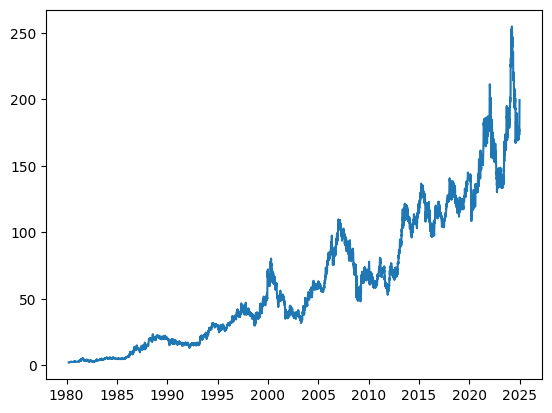

In [4]:
plt.plot(df['Adj Close'])
plt.show()

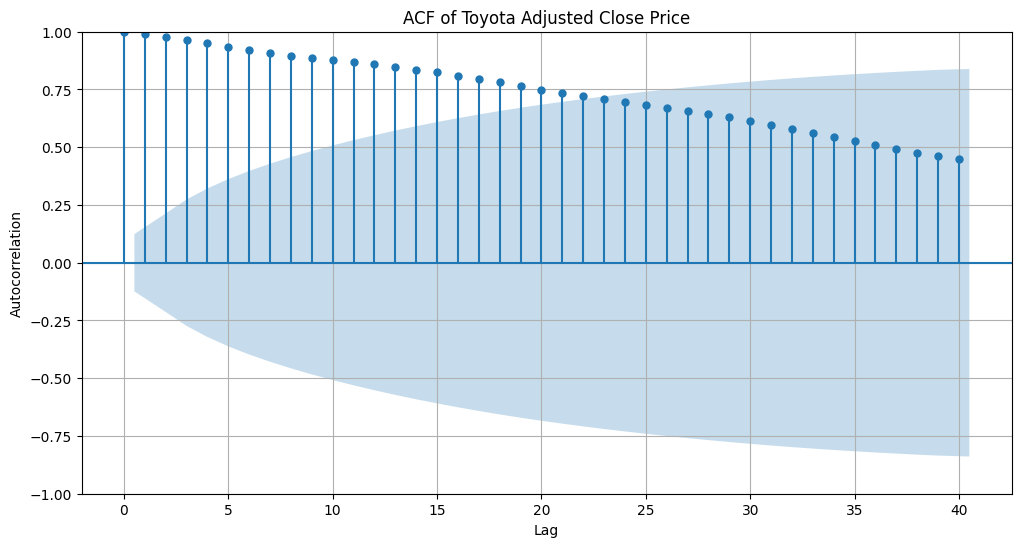

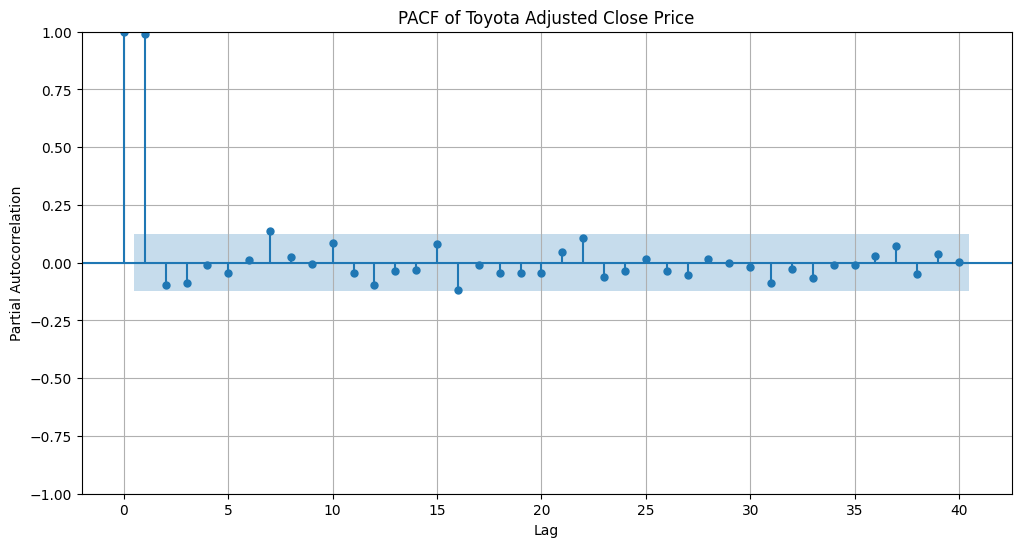

In [5]:
# acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


start_date = '2024-01-01'
end_date = '2024-12-31'
filtered_df = df[(df.index >= start_date) & (df.index <= end_date)]

filtered_toyota_adj_close = filtered_df['Adj Close'].dropna()
toyota_adj_close = df['Adj Close'].dropna()

### ACF ###
plt.figure(figsize=(12, 6))
plot_acf(filtered_toyota_adj_close, lags=40, ax=plt.gca()) 
plt.title('ACF of Toyota Adjusted Close Price')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

### PACF ###
plt.figure(figsize=(12, 6))
plot_pacf(filtered_toyota_adj_close, lags=40, ax=plt.gca())
plt.title('PACF of Toyota Adjusted Close Price')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [6]:
# Confirming data as it is on Yahoo Finance, still unsure about the amount of 0s here

import yfinance as yf

ticker = yf.Ticker("TM")
historical_data = ticker.history(period="max")

test = pd.DataFrame(historical_data)
test

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,2.334143,2.296797,2.296797,41109,0.0,0.0
1980-03-18 00:00:00-05:00,0.000000,2.343480,2.306134,2.306134,9343,0.0,0.0
1980-03-19 00:00:00-05:00,2.306134,2.306134,2.306134,2.306134,0,0.0,0.0
1980-03-20 00:00:00-05:00,0.000000,2.343480,2.306134,2.306134,10277,0.0,0.0
1980-03-21 00:00:00-05:00,0.000000,2.399500,2.362154,2.362154,8409,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-31 00:00:00-04:00,175.750000,177.289993,174.660004,176.529999,335900,0.0,0.0
2025-04-01 00:00:00-04:00,175.800003,175.800003,173.369995,174.419998,474600,0.0,0.0
2025-04-02 00:00:00-04:00,176.110001,178.300003,175.240005,177.309998,307900,0.0,0.0


In [7]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag
count,11291.000000,11291.000000,11291.000000,11291.000000,11291.000000,1.129100e+04,11291.000000,11291.000000,10745.000000,11291.000000,11291.000000,1.129100e+04,11291.000000,11291.000000,11291.000000,11291.000000,11291.000000
mean,63.586275,72.057776,72.478879,71.646418,67.955424,2.146604e+05,4.391936,0.902177,17489.550511,1.687379,1365.554280,1.103008e+09,0.189000,0.205031,0.204942,0.201222,0.199717
std,52.272225,51.295776,51.552662,50.976716,55.851523,3.874256e+05,3.919802,0.910934,7602.248403,2.149653,1266.188038,1.066588e+09,0.391526,0.403742,0.403677,0.400932,0.399805
min,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00,0.040000,-2.410000,6475.930000,0.100000,98.220000,8.327778e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.224636,27.548208,27.735613,27.548208,0.000000,1.350000e+04,0.990000,0.190000,10949.090000,0.300000,376.780000,1.071028e+08,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.583900,66.040001,66.650002,65.440002,66.000000,9.100000e+04,4.330000,0.840000,16755.320000,0.500000,1115.050000,7.221111e+08,0.000000,0.000000,0.000000,0.000000,0.000000
75%,104.705669,114.295002,114.895000,113.625000,114.294998,2.923000e+05,6.220000,1.540000,21584.500000,2.500000,1709.790000,2.007832e+09,0.000000,0.000000,0.000000,0.000000,0.000000
max,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07,22.360000,2.910000,42224.020000,9.000000,6090.270000,6.423401e+09,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11291 entries, 1980-03-17 to 2024-12-27
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Adj Close                       11291 non-null  float64
 1   Close                           11291 non-null  float64
 2   High                            11291 non-null  float64
 3   Low                             11291 non-null  float64
 4   Open                            11291 non-null  float64
 5   Volume                          11291 non-null  int64  
 6   fed_funds_effective_rate        11291 non-null  float64
 7   T10Y2Y                          11291 non-null  float64
 8   nikkei225_close_in_yen          10745 non-null  float64
 9   japan_basic_discount_loan_rate  11291 non-null  float64
 10  sp500_close                     11291 non-null  float64
 11  sp500_volume                    11291 non-null  int64  
 12  monday_flag    

In [9]:
corrplot = df.corr()
corrplot

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag
Adj Close,1.000000,0.991369,0.991281,0.991450,0.979054,0.281017,-0.577470,-0.110054,0.457214,-0.642685,0.955161,0.782419,-0.004693,0.001346,0.000299,0.001538,0.001653
Close,0.991369,1.000000,0.999953,0.999953,0.991121,0.301755,-0.606115,-0.094482,0.431878,-0.702880,0.930072,0.781262,-0.004929,0.001277,0.000410,0.001642,0.001774
High,0.991281,0.999953,1.000000,0.999924,0.991119,0.303710,-0.606315,-0.094085,0.431633,-0.702781,0.930011,0.782820,-0.005012,0.001502,0.000509,0.001487,0.001684
Low,0.991450,0.999953,0.999924,1.000000,0.991014,0.299151,-0.605573,-0.095354,0.433252,-0.702389,0.930271,0.779561,-0.004958,0.001150,0.000318,0.001652,0.002013
Open,0.979054,0.991121,0.991119,0.991014,1.000000,0.312267,-0.623503,-0.070743,0.340002,-0.729156,0.917007,0.788213,-0.004799,0.001321,0.000437,0.001526,0.001664
Volume,0.281017,0.301755,0.303710,0.299151,0.312267,1.000000,-0.369597,0.274240,-0.130657,-0.302085,0.186159,0.547126,-0.002490,0.022071,0.009234,-0.009502,-0.019546
fed_funds_effective_rate,-0.577470,-0.606115,-0.606315,-0.605573,-0.623503,-0.369597,1.000000,-0.593314,-0.049683,0.786693,-0.475584,-0.662691,0.001181,-0.001199,0.002331,-0.004504,0.001518
T10Y2Y,-0.110054,-0.094482,-0.094085,-0.095354,-0.070743,0.274240,-0.593314,1.000000,-0.375384,-0.186196,-0.200800,0.173150,0.004653,0.004070,0.003074,0.003809,-0.014825
nikkei225_close_in_yen,0.457214,0.431878,0.431633,0.433252,0.340002,-0.130657,-0.049683,-0.375384,1.000000,-0.147293,0.527224,0.106222,0.000219,0.000913,0.000762,-0.001070,-0.000512
japan_basic_discount_loan_rate,-0.642685,-0.702880,-0.702781,-0.702389,-0.729156,-0.302085,0.786693,-0.186196,-0.147293,1.000000,-0.561858,-0.609803,0.004881,-0.001065,-0.000811,-0.001149,-0.002308


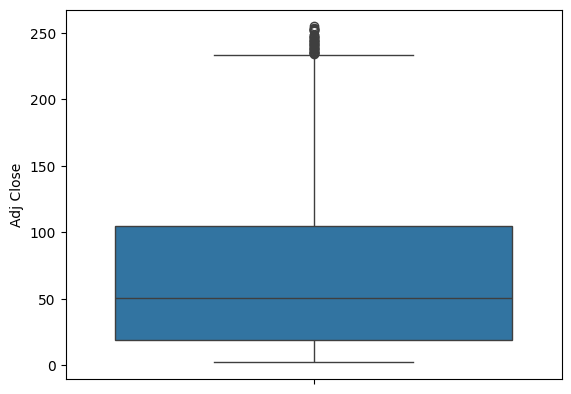

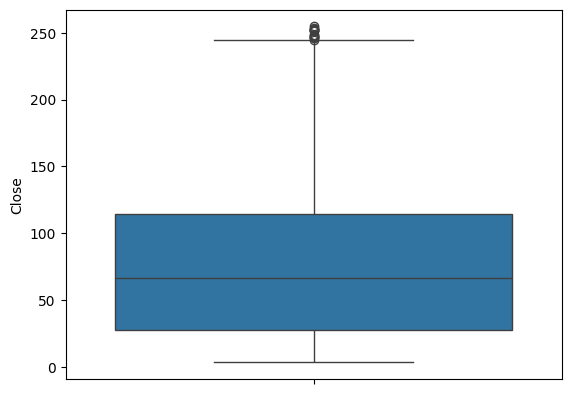

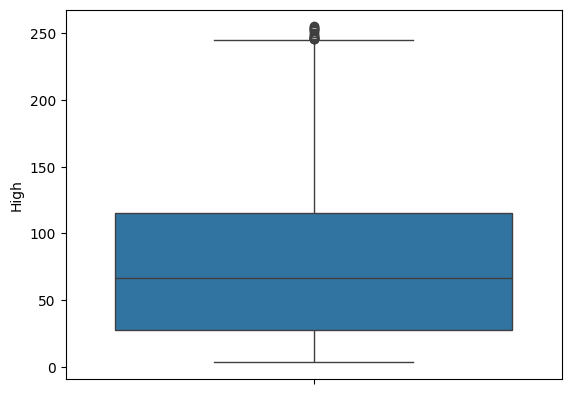

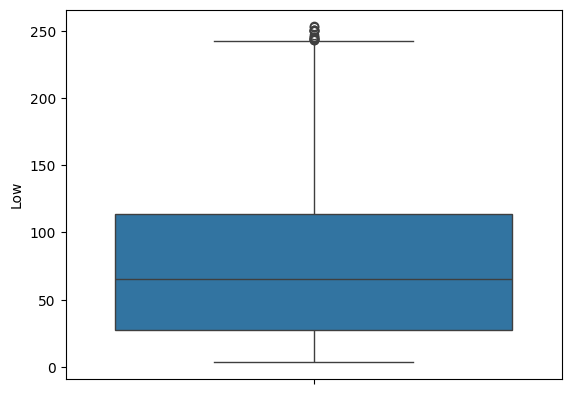

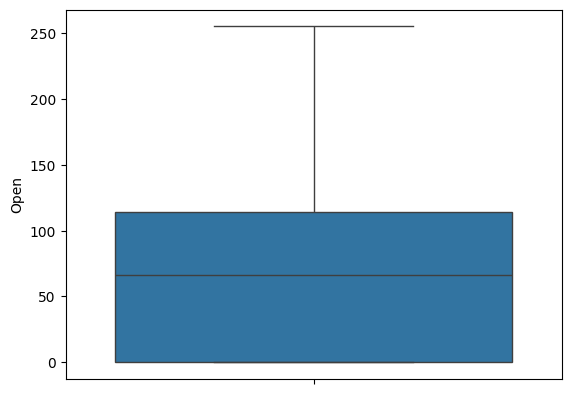

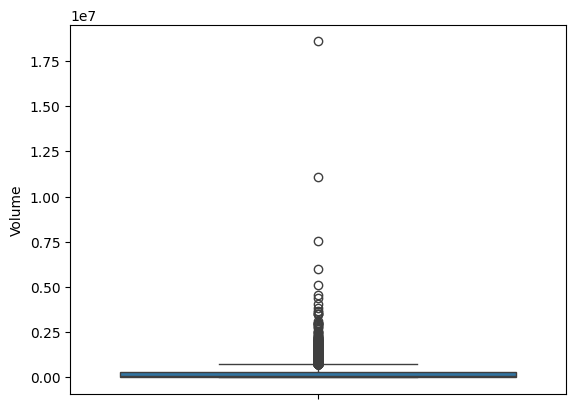

In [10]:
sns.boxplot(df['Adj Close'])
plt.show()

sns.boxplot(df['Close'])
plt.show()

sns.boxplot(df['High'])
plt.show()

sns.boxplot(df['Low'])
plt.show()

sns.boxplot(df['Open'])
plt.show()

sns.boxplot(df['Volume'])
plt.show()

In [128]:
df['TargetNextClose'] = df['Adj Close'].shift(-1)
df.head()

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag,TargetNextClose,MA_5_adj_close,5_day_SD,RSI,MACD,Signal_Line,BB_Upper,BB_Middle,BB_Lower
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,16.75,-2.24,6562.66,7.25,102.26,20566667,0,0,0,0,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,15.73,-2.02,6578.21,7.25,104.10,26300000,1,0,0,0,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,15.59,-1.98,6584.76,9.00,104.31,20288889,0,1,0,0,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,16.83,-2.41,NaN,9.00,103.12,18100000,0,0,1,0,0,2.362154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,17.68,-2.27,6571.77,9.00,102.31,17900000,0,0,0,1,0,2.371490,2.315471,0.026408,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
# Creating 7 day moving average of adj_close to capture short term trend
df['MA_5_adj_close'] = df['Adj Close'].rolling(window=5).mean() 

# creating 7 day moving average of standard deviation of adj_close
df['5_day_SD'] = df['Adj Close'].rolling(window=5).std()


# Adding in Technical indicators RSI, MACD, and Bollinger bands
import pandas_ta as ta
# RSI
df['RSI'] = ta.rsi(df['Adj Close'], length=5)
# MACD: This will be 2 columns, one is the MACD(diff of fast and slow EMA)
# and the other is the signal line (the EMA of the MACD line)
macd = ta.macd(df['Adj Close'], fast=5, slow=15, signal=7)
df['MACD'] = macd['MACD_5_15_7']        # MACD line
df['Signal_Line'] = macd['MACDs_5_15_7']  # Signal line
# Bollinger Bands: Creates 3 lines, lower, middle and upper bands
# Middle band is 7 day SMA of adj_close and the upper/lower bands is middle +- 2*SD
bollinger = ta.bbands(df['Adj Close'], length=7)
df['BB_Upper'] = bollinger['BBU_7_2.0']  # Upper Band
df['BB_Middle'] = bollinger['BBM_7_2.0'] # Middle Band
df['BB_Lower'] = bollinger['BBL_7_2.0']  # Lower Band



df.head()

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag,TargetNextClose,MA_5_adj_close,5_day_SD,RSI,MACD,Signal_Line,BB_Upper,BB_Middle,BB_Lower
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,16.75,-2.24,6562.66,7.25,102.26,20566667,0,0,0,0,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,15.73,-2.02,6578.21,7.25,104.10,26300000,1,0,0,0,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,15.59,-1.98,6584.76,9.00,104.31,20288889,0,1,0,0,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,16.83,-2.41,NaN,9.00,103.12,18100000,0,0,1,0,0,2.362154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,17.68,-2.27,6571.77,9.00,102.31,17900000,0,0,0,1,0,2.371490,2.315471,0.026408,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
corr2 = df.corr()
corr2

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag,TargetNextClose,MA_5_adj_close,5_day_SD,RSI,MACD,Signal_Line,BB_Upper,BB_Middle,BB_Lower
Adj Close,1.000000,0.991369,0.991281,0.991450,0.979054,0.281017,-0.577470,-0.110054,0.457214,-0.642685,0.955161,0.782419,-0.004693,0.001346,0.000299,0.001538,0.001653,0.999714,0.999650,0.669677,0.027232,0.080709,0.086808,0.999134,0.999461,0.999040
Close,0.991369,1.000000,0.999953,0.999953,0.991121,0.301755,-0.606115,-0.094482,0.431878,-0.702880,0.930072,0.781262,-0.004929,0.001277,0.000410,0.001642,0.001774,0.991044,0.990964,0.671326,0.030156,0.085230,0.091737,0.990690,0.990747,0.990047
High,0.991281,0.999953,1.000000,0.999924,0.991119,0.303710,-0.606315,-0.094085,0.431633,-0.702781,0.930011,0.782820,-0.005012,0.001502,0.000509,0.001487,0.001684,0.990966,0.990965,0.673188,0.027903,0.083250,0.090334,0.990767,0.990763,0.989999
Low,0.991450,0.999953,0.999924,1.000000,0.991014,0.299151,-0.605573,-0.095354,0.433252,-0.702389,0.930271,0.779561,-0.004958,0.001150,0.000318,0.001652,0.002013,0.991138,0.991089,0.669319,0.029539,0.085957,0.092752,0.990737,0.990865,0.990240
Open,0.979054,0.991121,0.991119,0.991014,1.000000,0.312267,-0.623503,-0.070743,0.340002,-0.729156,0.917007,0.788213,-0.004799,0.001321,0.000437,0.001526,0.001664,0.978770,0.978817,0.663395,0.026524,0.079518,0.086694,0.978563,0.978627,0.977944
Volume,0.281017,0.301755,0.303710,0.299151,0.312267,1.000000,-0.369597,0.274240,-0.130657,-0.302085,0.186159,0.547126,-0.002490,0.022071,0.009234,-0.009502,-0.019546,0.280783,0.282012,0.343402,-0.034071,-0.077006,-0.069677,0.287672,0.282589,0.277013
fed_funds_effective_rate,-0.577470,-0.606115,-0.606315,-0.605573,-0.623503,-0.369597,1.000000,-0.593314,-0.049683,0.786693,-0.475584,-0.662691,0.001181,-0.001199,0.002331,-0.004504,0.001518,-0.577642,-0.577370,-0.377713,-0.021912,-0.026990,-0.029542,-0.576480,-0.577338,-0.577800
T10Y2Y,-0.110054,-0.094482,-0.094085,-0.095354,-0.070743,0.274240,-0.593314,1.000000,-0.375384,-0.186196,-0.200800,0.173150,0.004653,0.004070,0.003074,0.003809,-0.014825,-0.109955,-0.111759,-0.081665,0.020261,-0.003554,-0.004482,-0.113078,-0.112631,-0.112073
nikkei225_close_in_yen,0.457214,0.431878,0.431633,0.433252,0.340002,-0.130657,-0.049683,-0.375384,1.000000,-0.147293,0.527224,0.106222,0.000219,0.000913,0.000762,-0.001070,-0.000512,0.456666,0.456735,0.305134,0.007395,0.048340,0.053170,0.456447,0.456408,0.456023
japan_basic_discount_loan_rate,-0.642685,-0.702880,-0.702781,-0.702389,-0.729156,-0.302085,0.786693,-0.186196,-0.147293,1.000000,-0.561858,-0.609803,0.004881,-0.001065,-0.000811,-0.001149,-0.002308,-0.642784,-0.642709,-0.445698,-0.004165,-0.032569,-0.036526,-0.642914,-0.642745,-0.642075


In [ ]:
! pip install statsforecast

In [182]:
from statsforecast import StatsForecast
from sklearn.metrics import mean_squared_error

In [17]:
df_long = df.copy()
df_long.reset_index(inplace=True)
df_long['unique_id'] = "Toyota"
df_long = df_long.rename(columns={"Date": "ds", "TargetNextClose": "y"})
df_long = df_long[["ds", "unique_id", "y"]]

print(df_long.head())


          ds unique_id         y
0 1980-03-17    Toyota  2.306134
1 1980-03-18    Toyota  2.306134
2 1980-03-19    Toyota  2.306134
3 1980-03-20    Toyota  2.362154
4 1980-03-21    Toyota  2.371490


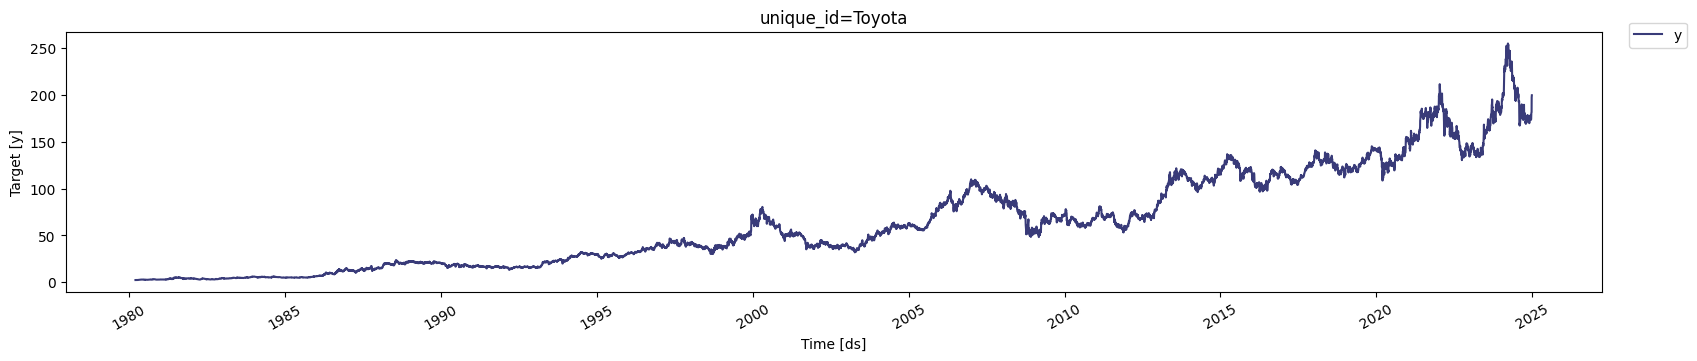

In [18]:
StatsForecast.plot(df_long)

In [171]:
df_long['ds'] = pd.to_datetime(df_long['ds'], format='%Y-%m')
split_date = '2016-01-01'
df_long['split'] = np.where(df_long.ds < split_date, 'train', 'test')
df_long['unique_id'] = 0
train_data = df_long[df_long['split']=='train'].drop('split', axis=1).copy()
test_data = df_long[df_long['split']=='test'].drop('split', axis=1).copy()
df_long=df_long.drop(columns='id')
df_long.head()

,ds,y,split,unique_id
0,1980-03-17,2.306134,train,0
1,1980-03-18,2.306134,train,0
2,1980-03-19,2.306134,train,0
3,1980-03-20,2.362154,train,0
4,1980-03-21,2.371490,train,0


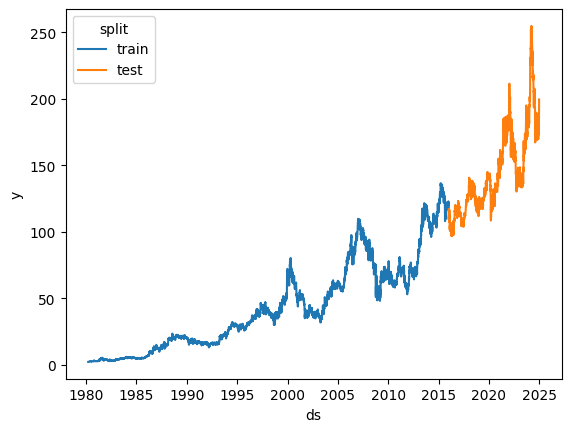

In [172]:
sns.lineplot(df_long, x='ds', y='y', hue='split')
plt.show()

In [173]:
from statsforecast.models import (
    HoltWinters,
    CrostonClassic as Croston, 
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)

In [174]:
models = [
    HoltWinters(),
    Croston(),
    SeasonalNaive(season_length=24),
    HistoricAverage(),
    DOT(season_length=24)
]

In [175]:
sf = StatsForecast( 
    models=models,
    freq='D', 
    fallback_model = SeasonalNaive(season_length=7),
    n_jobs=-1,
)

In [176]:
forecasts_df = sf.forecast(df=train_data, h=48, level=[90])

forecasts_df.head()

,unique_id,ds,HoltWinters,HoltWinters-lo-90,HoltWinters-hi-90,CrostonClassic,CrostonClassic-lo-90,CrostonClassic-hi-90,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,HistoricAverage,HistoricAverage-lo-90,HistoricAverage-hi-90,DynamicOptimizedTheta,DynamicOptimizedTheta-lo-90,DynamicOptimizedTheta-hi-90
0,0,2016-01-01,122.923843,119.358226,126.489461,122.923843,119.358226,126.489461,120.284569,114.201949,126.367188,43.294623,-11.511345,98.100591,117.603484,116.305682,119.240438
1,0,2016-01-02,121.589699,118.024081,125.155316,121.589699,118.024081,125.155316,121.734718,115.652099,127.817338,43.294623,-11.511345,98.100591,117.561744,115.600886,119.609595
2,0,2016-01-03,120.332909,116.767291,123.898526,120.332909,116.767291,123.898526,121.560699,115.478080,127.643319,43.294623,-11.511345,98.100591,117.644671,114.800148,120.069871
3,0,2016-01-04,120.613274,117.047656,124.178891,120.613274,117.047656,124.178891,120.574608,114.491988,126.657227,43.294623,-11.511345,98.100591,117.585908,114.709641,120.061177
4,0,2016-01-05,119.124458,115.558841,122.690076,119.124458,115.558841,122.690076,121.715385,115.632766,127.798005,43.294623,-11.511345,98.100591,117.557884,114.598490,120.550854


In [177]:
sf.fit(df=train_data,
       id_col='unique_id',
       time_col='ds',
       target_col='y',
       )

y_pred_all = sf.predict(h=len(test_data))

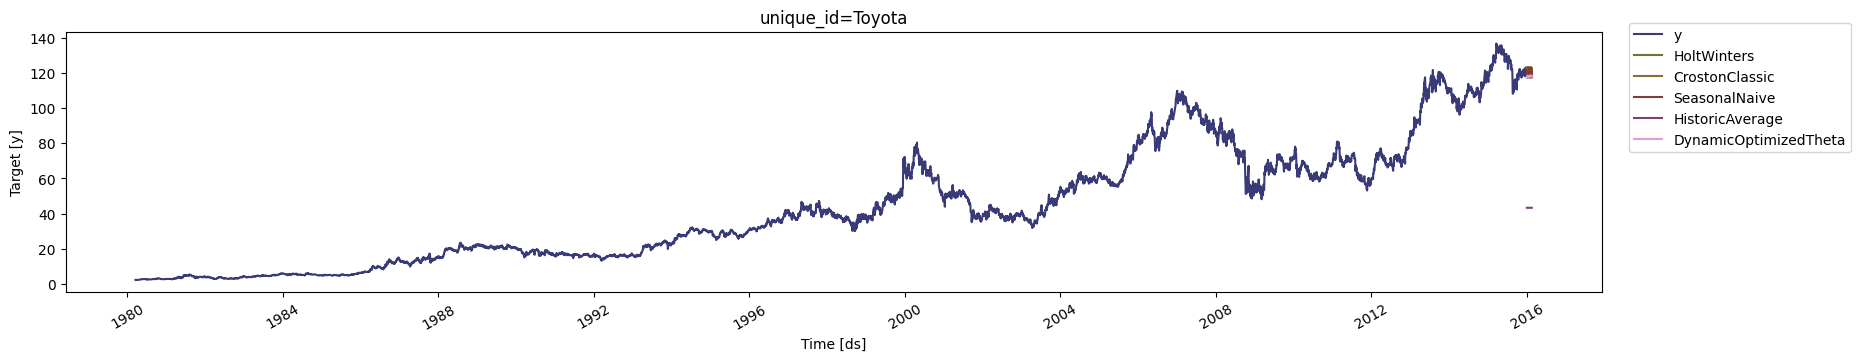

In [156]:
sf.plot(train_data,forecasts_df)

In [181]:
y_pred_all

,unique_id,ds,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta
0,0,2016-01-01,122.923843,120.00075,120.284569,43.294623,117.603484
1,0,2016-01-02,121.589699,120.00075,121.734718,43.294623,117.561744
2,0,2016-01-03,120.332909,120.00075,121.560699,43.294623,117.644671
3,0,2016-01-04,120.613274,120.00075,120.574608,43.294623,117.585908
4,0,2016-01-05,119.124458,120.00075,121.715385,43.294623,117.557884
...,...,...,...,...,...,...,...
2257,0,2022-03-07,120.613274,120.00075,121.734718,43.294623,146.266477
2258,0,2022-03-08,119.124458,120.00075,121.560699,43.294623,146.368645
2259,0,2022-03-09,118.950440,120.00075,120.574608,43.294623,146.294527
2260,0,2022-03-10,117.422958,120.00075,121.715385,43.294623,146.258652


In [ ]:
y_true = test_data['y']
y_pred = y_pred_all['CrostonClassic']
mean_squared_error(y_true, y_pred)

XGBoost Model

In [86]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor

In [131]:
df2 = df.ffill()

In [132]:
X = df2.drop(columns='TargetNextClose')
y = df2['TargetNextClose']
tscv = TimeSeriesSplit(n_splits=5)

In [116]:
param_grid = {
        'max_depth': np.arange(2,4).tolist(),
        'learning_rate': np.arange(.01,.1,.075).tolist(),
        'n_estimators': np.arange(100,500,200).tolist(),
        'gamma': np.arange(0.1,5,1).tolist(),
        'min_child_weight': np.arange(5,20,5).tolist(),
        'n_iter_no_change': np.arange(20,50,5).tolist()
    }

grid_search = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', random_state=42, alpha=1),
                               param_grid=param_grid,
                               cv=tscv,
                               scoring='neg_mean_squared_error',
                               n_jobs=-1)

In [117]:
rmse_train_list = []
rmse_test_list = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test) 

    X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_

    best_model.fit(X_train_scaled, y_train,
                   eval_set=[(X_test_scaled, y_test)],
                   verbose=False)

    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)

    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)
    
    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)
    

print(f"RMSE train: {np.mean(rmse_train)}")
print(f"RMSE Test: {np.mean(rmse_test)}")

RMSE train: 0.9164068712373069
RMSE Test: 34.60069735293718


In [118]:
best_model

XGBRegressor(alpha=1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08499999999999999, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_iter_no_change=20, ...)

Terribly overfitting above

PCA

In [120]:
from sklearn.decomposition import PCA

In [137]:
df2 = df.bfill()
X = df2.drop(columns='TargetNextClose')
y = df2['TargetNextClose']
X

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag,MA_5_adj_close,5_day_SD,RSI,MACD,Signal_Line,BB_Upper,BB_Middle,BB_Lower
Date,,,,,,,,,,,,,,,,,,,,,,,,,
1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,16.75,-2.24,6562.66,7.25,102.26,20566667,0,0,0,0,0,2.315471,0.026408,100.000000,-0.036779,-0.005813,2.387737,2.328809,2.269880
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,15.73,-2.02,6578.21,7.25,104.10,26300000,1,0,0,0,0,2.315471,0.026408,100.000000,-0.036779,-0.005813,2.387737,2.328809,2.269880
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,15.59,-1.98,6584.76,9.00,104.31,20288889,0,1,0,0,0,2.315471,0.026408,100.000000,-0.036779,-0.005813,2.387737,2.328809,2.269880
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,16.83,-2.41,6571.77,9.00,103.12,18100000,0,0,1,0,0,2.315471,0.026408,100.000000,-0.036779,-0.005813,2.387737,2.328809,2.269880
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,17.68,-2.27,6571.77,9.00,102.31,17900000,0,0,0,1,0,2.315471,0.026408,100.000000,-0.036779,-0.005813,2.387737,2.328809,2.269880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700,4.33,0.22,38701.90,0.50,5930.85,6423401075,0,0,0,1,0,174.706000,1.979022,71.164408,0.447518,0.212408,178.582616,175.184285,171.785953
2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700,4.33,0.29,39161.34,0.50,5974.07,2322849535,0,0,0,0,1,175.945999,3.192322,78.616075,1.394288,0.507878,180.659547,175.691428,170.723309
2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600,4.33,0.30,39036.85,0.50,6040.04,1133216588,1,0,0,0,0,177.575998,3.551262,81.223115,2.092640,0.904068,182.886447,176.487141,170.087836


In [138]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.17255755, -1.34064829, -1.34109848, ..., -1.17383409,
        -1.17207548, -1.1693227 ],
       [-1.17237893, -1.34038746, -1.34083895, ..., -1.17383409,
        -1.17207548, -1.1693227 ],
       [-1.17237893, -1.34038746, -1.34187708, ..., -1.17383409,
        -1.17207548, -1.1693227 ],
       ...,
       [ 2.25452306,  2.13228202,  2.11911384, ...,  2.19219523,
         2.16290792,  2.13037019],
       [ 2.55928746,  2.44284781,  2.43492138, ...,  2.42539562,
         2.22612746,  2.01431928],
       [ 2.6006115 ,  2.48495848,  2.49311688, ...,  2.57048266,
         2.29790942,  2.00875583]])

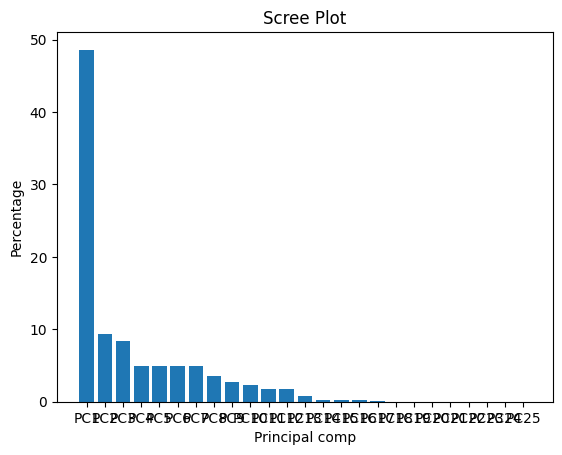

In [139]:
pca = PCA()
pca_data = pca.fit_transform(X_scaled)

# Multiply explained by 100 and round
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
# Create labels for barplot
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree Plot')

plt.show()

In [141]:
features = ['Adj Close', 'Close', 'High',
            'Low', 'Open', 'Volume', 'fed_funds_effective_rate', 
            'T10Y2Y',	'nikkei225_close_in_yen', 'japan_basic_discount_loan_rate',
            'sp500_close',	'sp500_volume',	'monday_flag',	'tuesday_flag',	'wednesday_flag',	
            'thursday_flag', 'friday_flag',	'MA_5_adj_close', '5_day_SD', 'RSI', 'MACD', 'Signal_Line',
            'BB_Upper',	'BB_Middle', 'BB_Lower']

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
pd.DataFrame(loadings, columns=labels, index=features)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
Adj Close,0.990609,0.051133,-0.075871,0.000605,0.001347,-0.000380,0.001700,-0.006207,-0.002396,-0.036838,-0.060778,0.056438,-0.026563,-0.001312,-0.004789,0.009278,-3.426903e-02,0.002754,1.495253e-04,1.121902e-02,-1.683916e-04,-1.876045e-04,-9.734284e-04,4.606490e-04,-0.0
Close,0.992995,0.037614,-0.036453,-0.000221,-0.000482,0.001974,0.000832,-0.017638,-0.004987,-0.051820,-0.022386,-0.014140,-0.047190,-0.058157,-0.008128,0.022792,3.017626e-02,-0.021203,4.176417e-05,1.880033e-03,-2.723867e-05,-5.920046e-04,4.404876e-03,9.202799e-05,0.0
High,0.993225,0.035177,-0.036703,-0.000075,-0.000163,0.001933,0.000766,-0.015768,-0.006152,-0.050443,-0.021217,-0.013599,-0.045803,-0.058557,-0.008379,0.022211,3.129278e-02,-0.020977,-2.933768e-04,-1.560613e-03,2.871633e-05,-4.431519e-03,-2.597280e-03,-1.640865e-05,-0.0
Low,0.992744,0.039133,-0.037830,-0.000301,-0.000739,0.002155,0.000794,-0.020411,-0.006081,-0.052181,-0.023832,-0.014181,-0.048149,-0.058131,-0.008602,0.023030,2.951713e-02,-0.020772,4.693243e-04,-6.723449e-04,-6.283847e-06,5.086415e-03,-1.788261e-03,-7.490392e-05,-0.0
Open,0.984953,0.009700,0.009128,-0.001116,-0.002157,0.004271,0.000281,-0.010640,-0.017953,-0.133002,0.007360,-0.019489,-0.067304,-0.030458,0.003513,0.013294,5.531187e-02,0.049901,-3.208779e-06,1.346183e-04,4.017038e-07,1.163567e-05,1.237990e-05,-7.727771e-07,-0.0
Volume,0.345073,-0.364551,0.414113,0.021124,0.045488,-0.008594,-0.002210,0.637674,-0.065498,0.235572,-0.200289,-0.235860,-0.105124,0.028559,-0.002586,0.000384,-1.212661e-03,0.000250,2.269931e-05,2.008884e-06,6.049445e-07,8.656486e-06,-9.671374e-07,-4.454885e-07,-0.0
fed_funds_effective_rate,-0.648309,0.280673,-0.568290,0.010957,0.032784,-0.025323,0.002968,0.335556,-0.059627,-0.116125,-0.037721,0.039113,-0.043187,-0.110485,0.164022,-0.050703,-8.425097e-03,0.000767,4.356260e-05,4.539485e-07,-3.148118e-06,2.930039e-06,-2.303820e-06,-2.841733e-07,-0.0
T10Y2Y,-0.049307,-0.368429,0.785968,-0.011883,-0.026849,0.018035,-0.000689,-0.264677,0.042931,0.221841,-0.082299,0.303939,-0.091868,-0.061033,0.098744,-0.028382,1.923233e-04,0.000684,2.033331e-05,-5.236983e-06,-6.546356e-06,5.325901e-07,-2.216482e-08,-2.638631e-07,-0.0
nikkei225_close_in_yen,0.427319,0.286868,-0.530288,0.006904,0.010125,-0.016757,0.005356,-0.211409,0.118186,0.600831,-0.115497,-0.116322,0.073984,-0.036521,0.009556,0.001019,7.506190e-03,0.006522,9.570452e-06,1.842061e-05,-3.140972e-06,3.126837e-06,4.922282e-06,5.505707e-08,0.0
japan_basic_discount_loan_rate,-0.718705,0.165544,-0.317108,0.009164,0.021804,-0.023511,0.005631,0.272988,-0.021600,0.068572,-0.240754,0.452561,-0.021590,0.019624,-0.094014,0.042370,2.222286e-02,0.000532,1.049387e-06,-1.607142e-05,3.243622e-06,9.288664e-06,7.326625e-06,-7.900312e-08,0.0


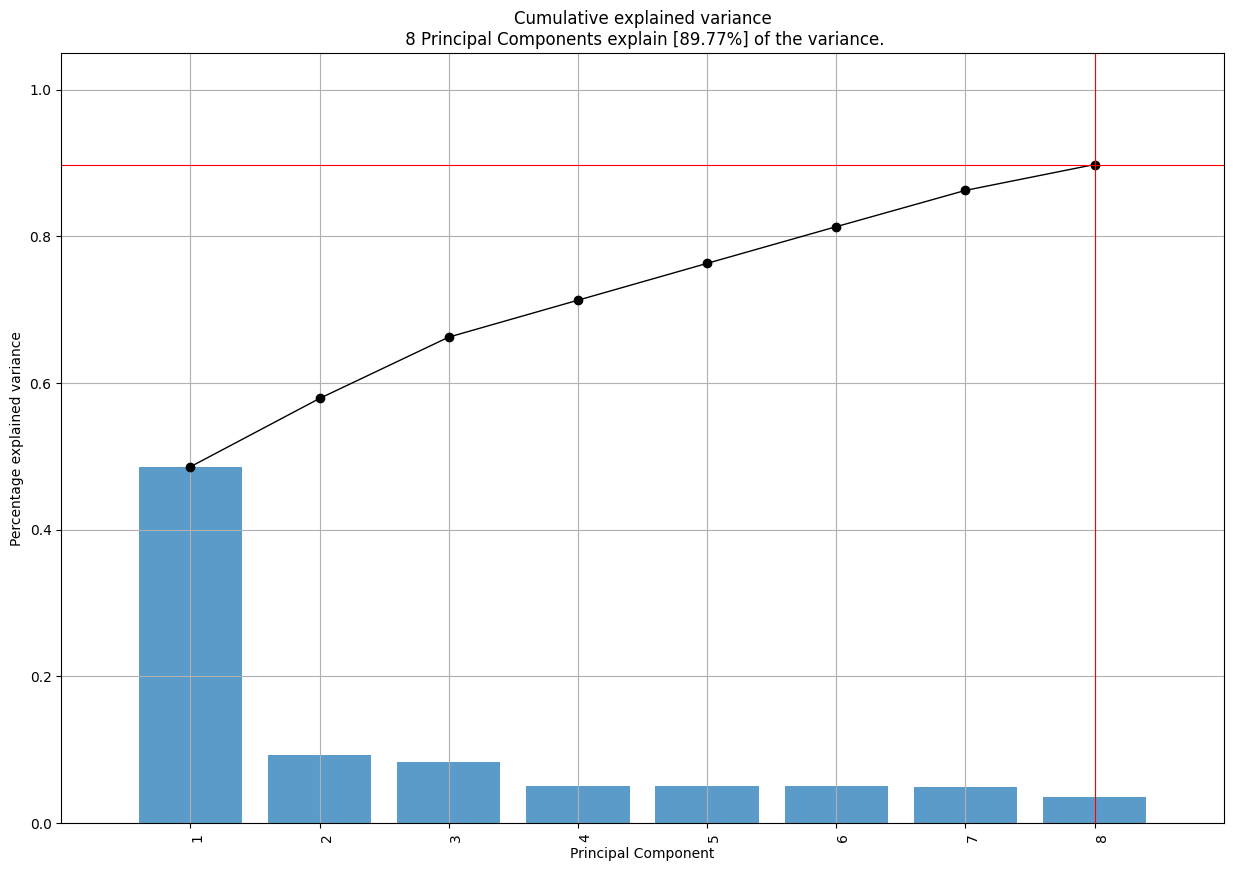

In [143]:
from pca import pca
scaled_data_df = pd.DataFrame(X_scaled, columns=features)
###########################################################
# COMPUTE AND VISUALIZE PCA
###########################################################
# Initialize the PCA
# Can use normalize=True to standardize data
model = pca(8, verbose=False)

# Fit and transform
results = model.fit_transform(X=scaled_data_df, verbose=False)

# Plot the explained variance
fig, ax = model.plot()

In [144]:
print(results['topfeat'])

     PC                         feature   loading  type
0   PC1                            High  0.285046  best
1   PC2                            MACD  0.568323  best
2   PC3                          T10Y2Y  0.543592  best
3   PC4                    tuesday_flag  0.787273  best
4   PC5                  wednesday_flag  0.629106  best
5   PC6                     friday_flag  0.755136  best
6   PC7                     monday_flag  0.894531  best
7   PC8                          Volume  0.678983  best
8   PC1                       Adj Close  0.284295  weak
9   PC1                           Close  0.284980  weak
10  PC1                             Low  0.284908  weak
11  PC1                            Open  0.282672  weak
12  PC3        fed_funds_effective_rate -0.393041  weak
13  PC3          nikkei225_close_in_yen -0.366758  weak
14  PC8  japan_basic_discount_loan_rate  0.290673  weak
15  PC1                     sp500_close  0.269394  weak
16  PC1                    sp500_volume  0.23561

In [145]:
results['loadings']

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag,MA_5_adj_close,5_day_SD,RSI,MACD,Signal_Line,BB_Upper,BB_Middle,BB_Lower
PC1,0.284295,0.284980,0.285046,0.284908,0.282672,0.099033,-0.186059,-0.014151,0.122637,-0.206262,0.269394,0.235613,-0.001613,0.000643,0.000276,0.000873,-0.000131,0.284284,0.203182,0.005416,0.020435,0.022788,0.284556,0.284254,0.283718
PC2,0.033505,0.024647,0.023050,0.025642,0.006356,-0.238873,0.183912,-0.241414,0.187971,0.108473,0.049347,-0.163111,-0.001252,-0.001181,0.001703,-0.004458,0.004952,0.026605,-0.029968,0.397798,0.568323,0.536016,0.021278,0.022554,0.023882
PC3,-0.052474,-0.025212,-0.025384,-0.026164,0.006313,0.286409,-0.393041,0.543592,-0.366758,-0.219319,-0.144109,0.166067,0.003007,0.015600,0.009651,0.000353,-0.028550,-0.056293,-0.034525,0.237921,0.293564,0.271523,-0.058387,-0.058458,-0.058488
PC4,0.000539,-0.000197,-0.000067,-0.000269,-0.000995,0.018832,0.009769,-0.010594,0.006155,0.008170,0.001699,0.000548,-0.015084,0.787273,-0.603401,-0.102437,-0.068298,0.000297,-0.000752,0.006079,-0.001318,-0.003347,0.000403,0.000331,0.000255
PC5,0.001202,-0.000431,-0.000145,-0.000660,-0.001925,0.040590,0.029254,-0.023958,0.009035,0.019456,0.003626,0.009430,-0.077219,0.373099,0.629106,-0.562656,-0.372146,0.000937,0.002102,0.012357,-0.007739,-0.010927,0.001261,0.001056,0.000838
PC6,-0.000340,0.001765,0.001729,0.001927,0.003818,-0.007683,-0.022639,0.016124,-0.014982,-0.021020,-0.003920,-0.020497,0.043576,-0.074644,-0.076034,-0.643821,0.755136,-0.000163,-0.006855,-0.000982,0.000764,0.002384,-0.000380,-0.000224,-0.000059
PC7,0.001528,0.000748,0.000689,0.000714,0.000253,-0.001987,0.002668,-0.000619,0.004816,0.005063,0.002942,-0.000793,0.894531,-0.171630,-0.172950,-0.238419,-0.288975,0.001363,-0.001450,0.002009,-0.002222,-0.002012,0.001450,0.001377,0.001299
PC8,-0.006609,-0.018780,-0.016789,-0.021734,-0.011329,0.678983,0.357294,-0.281824,-0.225105,0.290673,-0.027731,0.215002,0.005885,-0.038559,-0.022862,0.013788,0.041706,-0.008974,0.344998,0.151531,0.042475,0.007600,0.001787,-0.009592,-0.021581


Lastly, do LSTM or CNN